## 1. Import libraries needed.

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
#import xgboost as xgb
#from xgboost.sklearn import XGBRegressor
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings("ignore")

## 2. load the training dataset

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

StoreID        Date  IsHoliday  IsOpen  HasPromotions     StoreType  \
0     1000  01/03/2016          0       1              0  Hyper Market   
1     1000  02/03/2016          0       1              0  Hyper Market   
2     1000  04/03/2016          0       1              0  Hyper Market   
3     1000  05/03/2016          0       1              0  Hyper Market   
4     1000  06/03/2016          0       0              0  Hyper Market   

  AssortmentType  NearestCompetitor  Region  NumberOfCustomers  \
0        General                326       7                495   
1        General                326       7                608   
2        General                326       7                665   
3        General                326       7                630   
4        General                326       7                  0   

        ...        Mean_TemperatureC  Mean_VisibilityKm  Mean_Wind_SpeedKm_h  \
0       ...                        1               11.0                   16   
1       ...                        3               13.0                   10   
2       ...                        3               11.0                   10   
3       ...                        3               15.0                   10   
4       ...                        1               12.0                    5   

   Min_Dew_PointC  Min_Humidity Min_Sea_Level_PressurehPa  Min_TemperatureC  \
0              -2            70                      1029                 1   
1              -2            58                      1025                 1   
2              -3            55                      1023                 2   
3              -6            25                      1022                -1   
4              -6            48                      1022                -5   

   Min_VisibilitykM  Precipitationmm  WindDirDegrees  
0               6.0              0.0              23  
1              10.0              0.0              56  
2               8.0              0.0              22  
3              10.0              0.0             108  
4               5.0              0.0              46  

[5 rows x 36 columns]

In [4]:
train.describe()

StoreID      IsHoliday         IsOpen  HasPromotions  \
count  523021.000000  523021.000000  523021.000000  523021.000000   
mean     1373.953914       0.029718       0.829714       0.383292   
std       216.395820       0.169808       0.375884       0.486189   
min      1000.000000       0.000000       0.000000       0.000000   
25%      1187.000000       0.000000       1.000000       0.000000   
50%      1373.000000       0.000000       1.000000       0.000000   
75%      1561.000000       0.000000       1.000000       1.000000   
max      1748.000000       1.000000       1.000000       1.000000   

       NearestCompetitor         Region  NumberOfCustomers  NumberOfSales  \
count       523021.00000  523021.000000      523021.000000  523021.000000   
mean          8002.71122       5.713151         259.325073    4057.377536   
std          11537.70753       3.357190         185.857102    2729.630381   
min             47.00000       0.000000           0.000000       0.000000   
25%           1057.00000       3.000000         166.000000    2573.000000   
50%           3321.00000       6.000000         251.000000    4020.000000   
75%           9673.00000       9.000000         345.000000    5538.000000   
max          85070.00000      10.000000        2206.000000   26641.000000   

       Region_AreaKM2     Region_GDP       ...        Mean_TemperatureC  \
count   523021.000000  523021.000000       ...            523021.000000   
mean     12381.265718   14050.547848       ...                10.273205   
std       9140.692427    2755.425404       ...                 7.041167   
min        344.000000    9893.000000       ...               -13.000000   
25%       7215.000000   11849.000000       ...                 4.000000   
50%       9643.000000   15017.000000       ...                11.000000   
75%      15566.000000   15931.000000       ...                16.000000   
max      32221.000000   23931.000000       ...                30.000000   

       Mean_VisibilityKm  Mean_Wind_SpeedKm_h  Min_Dew_PointC   Min_Humidity  \
count      511683.000000        523021.000000   523021.000000  523021.000000   
mean           12.151025            11.724961        3.737584      51.375624   
std             4.978385             5.791031        5.909098      19.284023   
min             0.000000             2.000000      -18.000000      10.000000   
25%            10.000000             8.000000       -1.000000      36.000000   
50%            11.000000            11.000000        4.000000      51.000000   
75%            14.000000            14.000000        8.000000      66.000000   
max            31.000000            53.000000       18.000000     100.000000   

       Min_Sea_Level_PressurehPa  Min_TemperatureC  Min_VisibilitykM  \
count              523021.000000     523021.000000     511683.000000   
mean                 1012.078435          6.202315          7.223408   
std                     8.699236          6.312993          4.899575   
min                   970.000000        -15.000000          0.000000   
25%                  1007.000000          1.000000          3.000000   
50%                  1013.000000          7.000000          8.000000   
75%                  1018.000000         11.000000         10.000000   
max                  1038.000000         24.000000         31.000000   

       Precipitationmm  WindDirDegrees  
count    523021.000000   523021.000000  
mean          0.808278      170.458096  
std           2.631428      101.728193  
min           0.000000       -1.000000  
25%           0.000000       75.000000  
50%           0.000000      191.000000  
75%           0.250000      250.000000  
max          58.930000      360.000000  

[8 rows x 32 columns]

Returns the data types of the columns

In [5]:
train.dtypes

StoreID                         int64
Date                           object
IsHoliday                       int64
IsOpen                          int64
HasPromotions                   int64
StoreType                      object
AssortmentType                 object
NearestCompetitor               int64
Region                          int64
NumberOfCustomers               int64
NumberOfSales                   int64
Region_AreaKM2                  int64
Region_GDP                      int64
Region_PopulationK              int64
CloudCover                    float64
Events                         object
Max_Dew_PointC                  int64
Max_Gust_SpeedKm_h            float64
Max_Humidity                    int64
Max_Sea_Level_PressurehPa       int64
Max_TemperatureC                int64
Max_VisibilityKm              float64
Max_Wind_SpeedKm_h              int64
Mean_Dew_PointC                 int64
Mean_Humidity                   int64
Mean_Sea_Level_PressurehPa      int64
Mean_Tempera

List all different values of the column **StoreType**

In [6]:
train.StoreType.unique()

array(['Hyper Market', 'Super Market', 'Standard Market',
       'Shopping Center'], dtype=object)

List all different values of the column **Assortment**

In [7]:
train.AssortmentType.unique()

array(['General', 'With Non-Food Department', 'With Fish Department'],
      dtype=object)

List all different values of the column **Events**

In [8]:
train.Events.unique()

array(['Rain-Snow', 'Snow', 'Rain', nan, 'Fog-Rain', 'Fog-Rain-Snow',
       'Fog', 'Rain-Thunderstorm', 'Rain-Hail', 'Fog-Rain-Thunderstorm',
       'Fog-Rain-Hail-Thunderstorm', 'Rain-Snow-Hail',
       'Fog-Rain-Snow-Hail', 'Fog-Snow', 'Snow-Hail', 'Fog-Thunderstorm',
       'Thunderstorm', 'Fog-Snow-Hail', 'Rain-Snow-Hail-Thunderstorm',
       'Fog-Rain-Hail', 'Rain-Hail-Thunderstorm',
       'Rain-Snow-Thunderstorm'], dtype=object)

Check if the train dataset has any missing value. The columns **CloudCover, Events, Max_Gust_SpeedKm_h, Max_VisibilityKm, Mean_VisibilityKm, Min_VisibilitykM** have null values.

In [9]:
train.isnull().any()

StoreID                       False
Date                          False
IsHoliday                     False
IsOpen                        False
HasPromotions                 False
StoreType                     False
AssortmentType                False
NearestCompetitor             False
Region                        False
NumberOfCustomers             False
NumberOfSales                 False
Region_AreaKM2                False
Region_GDP                    False
Region_PopulationK            False
CloudCover                     True
Events                         True
Max_Dew_PointC                False
Max_Gust_SpeedKm_h             True
Max_Humidity                  False
Max_Sea_Level_PressurehPa     False
Max_TemperatureC              False
Max_VisibilityKm               True
Max_Wind_SpeedKm_h            False
Mean_Dew_PointC               False
Mean_Humidity                 False
Mean_Sea_Level_PressurehPa    False
Mean_TemperatureC             False
Mean_VisibilityKm           

## 3. Preprocess dataset

For column with null values, fill null values with the column's **most frequent value**:

In [10]:
train = train.apply(lambda x:x.fillna(x.value_counts().index[0]))
test = test.apply(lambda x:x.fillna(x.value_counts().index[0]))
#train = train.dropna()

Filter data for store 1500 and plot sales data for first 365 days. We can clearly see that this store is closed on Sundays.

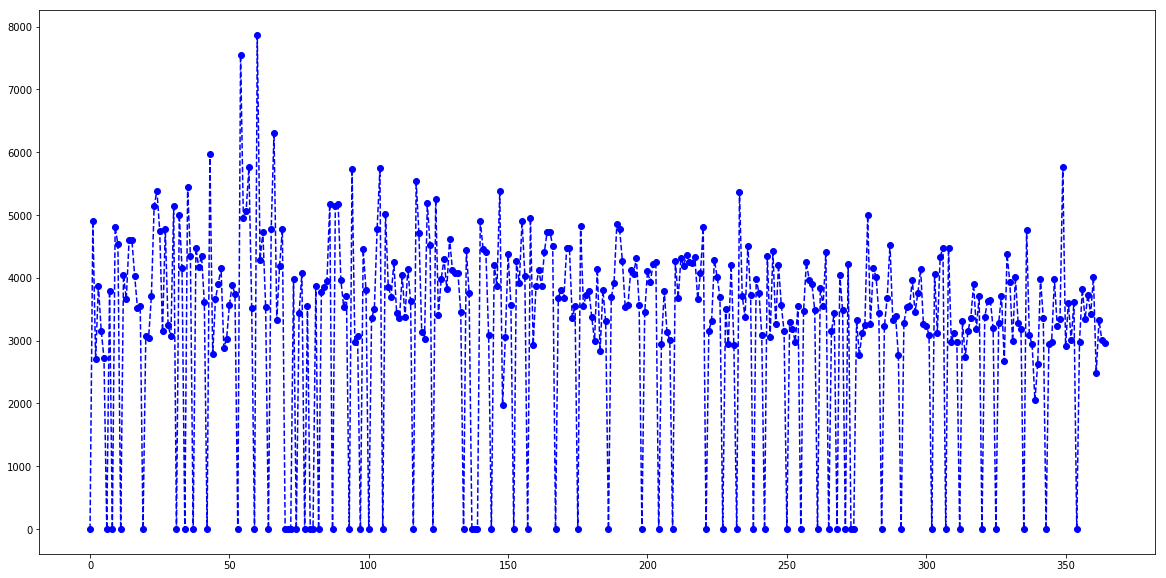

In [11]:
store_data = train[train.StoreID==1500].sort_values('Date')
plt.figure(figsize=(20, 10))  # Set figsize to increase size of figure
plt.plot(store_data.NumberOfSales.values[:365], 'bo--')

Apparently sales are higher when they run a promotion on the same day, which makes sense.

Text(0,0.5,'NumberOfSales')

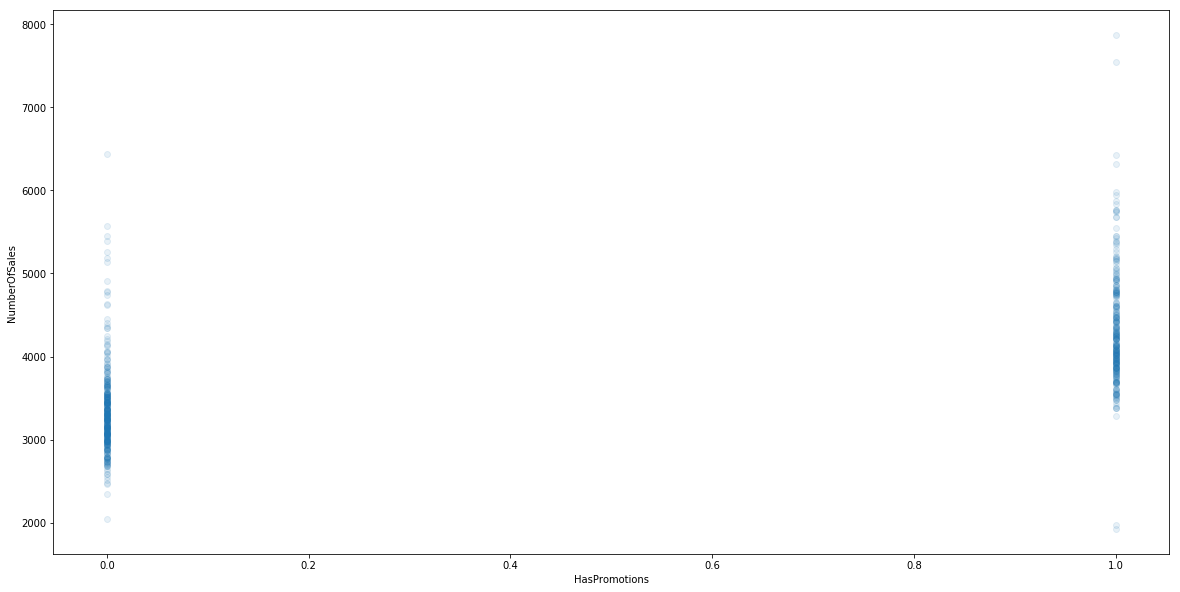

In [12]:
plt.figure(figsize=(20, 10))
plt.scatter(x=store_data[train.IsOpen==1].HasPromotions, y=store_data[store_data.IsOpen==1].NumberOfSales, alpha=0.1)
plt.xlabel('HasPromotions')
plt.ylabel('NumberOfSales')

Drop 3 features:
- **StoreID**: The store number doesn't in itself predict sales. E.g. a higher store number says nothing about the sales.
- **Date**: Date could be transformed into days, but it's not useful for the moment.
- **NumberOfCustomers**: In test.csv we won't have this feature later to make predictions. Which is obvious as we don't know the number of customers on a given day in the future.

Convert categorical feature(s) into dummy features:

In [13]:
train2=pd.get_dummies(train, columns=['StoreType', 'AssortmentType', 'Events'])

In [14]:
train2.head()

StoreID        Date  IsHoliday  IsOpen  HasPromotions  NearestCompetitor  \
0     1000  01/03/2016          0       1              0                326   
1     1000  02/03/2016          0       1              0                326   
2     1000  04/03/2016          0       1              0                326   
3     1000  05/03/2016          0       1              0                326   
4     1000  06/03/2016          0       0              0                326   

   Region  NumberOfCustomers  NumberOfSales  Region_AreaKM2  \
0       7                495           5676            9643   
1       7                608           8111            9643   
2       7                665           8300            9643   
3       7                630           7154            9643   
4       7                  0              0            9643   

          ...           Events_Rain-Hail  Events_Rain-Hail-Thunderstorm  \
0         ...                          0                              0   
1         ...                          0                              0   
2         ...                          0                              0   
3         ...                          0                              0   
4         ...                          0                              0   

   Events_Rain-Snow  Events_Rain-Snow-Hail  \
0                 1                      0   
1                 0                      0   
2                 0                      0   
3                 0                      0   
4                 0                      0   

   Events_Rain-Snow-Hail-Thunderstorm  Events_Rain-Snow-Thunderstorm  \
0                                   0                              0   
1                                   0                              0   
2                                   0                              0   
3                                   0                              0   
4                                   0                              0   

   Events_Rain-Thunderstorm  Events_Snow  Events_Snow-Hail  \
0                         0            0                 0   
1                         0            1                 0   
2                         0            0                 0   
3                         0            0                 0   
4                         0            0                 0   

   Events_Thunderstorm  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  

[5 rows x 61 columns]

In [15]:
print("The training dataset has {} examples and {} features.".format(train2.shape[0], train2.shape[1]))

The training dataset has 523021 examples and 61 features.


## 4. Split the dataset

Split train dataset further into train and test dataset.

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
  train2.drop([ 'NumberOfSales', 'StoreID', 'Date', 'NumberOfCustomers'], axis=1),
  train2.NumberOfSales,
  test_size=0.3,
  random_state = 42 )

## 5. Model comparision

### 5.1 Linear regression model

In [17]:
models = []
models.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()), ('LR', LinearRegression())])))
models.append(('ScaledLasso', Pipeline([('Scaler', StandardScaler()), ('LASSO', Lasso())])))
models.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()), ('EN', ElasticNet())])))
models.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()), ('CART',DecisionTreeRegressor())])))
#models.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()), ('KNN', KNeighborsRegressor())])))

### 5.2 Ensemble Methods

In [18]:
models.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()), ('AB', AdaBoostRegressor())])))
models.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()), ('GBM', GradientBoostingRegressor())])))
#models.append(('ScaledXGB', Pipeline([('Scaler', StandardScaler()), ('XGB', XGBRegressor())])))
models.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()), ('RF', RandomForestRegressor(random_state=42))])))
models.append(('ScaledET', Pipeline([('Scaler', StandardScaler()), ('ET', ExtraTreesRegressor())])))

### 5.3 Compare all models

In [19]:
#names=[]
#results = []
#for name, model in models:
#    model.fit(X_train, y_train)
#    result=model.predict(X_test)
#    results.append(result)
#    names.append(name)
#    model_mse = mean_squared_error(result, y_test)
#    model_rmse = np.sqrt(model_mse)
#    print("{} R squared: {:4f}, RMSE: {:4f}".format(name, model.score(X_test, y_test),  model_rmse))

names=[]
results=[]
Region = X_test.Region.unique()
for name, model in models:
    model.fit(X_train, y_train)
    result=model.predict(X_test)
    results.append(result)
    names.append(name)
    test = X_test.join(y_test)
    test['pred']=results[names.index(name)]
    Ertotal=0
    for i in Region:
        Ertotal = Ertotal + sum(abs(test.loc[test['Region'] == i].NumberOfSales - test.loc[test['Region'] == i].pred))/sum(test.loc[test['Region'] == i].NumberOfSales)
    E=Ertotal/len(Region)
    print("Model: {:20} Total Error: {:4f}".format(name, E))
    

Model: ScaledLR             Total Error: 0.315824
Model: ScaledLasso          Total Error: 0.315674
Model: ScaledEN             Total Error: 0.345159
Model: ScaledCART           Total Error: 0.204236
Model: ScaledAB             Total Error: 0.400853
Model: ScaledGBM            Total Error: 0.274593
Model: ScaledRF             Total Error: 0.156206
Model: ScaledET             Total Error: 0.162311


Plot the starting 90 predictive and real sale number of the test data.

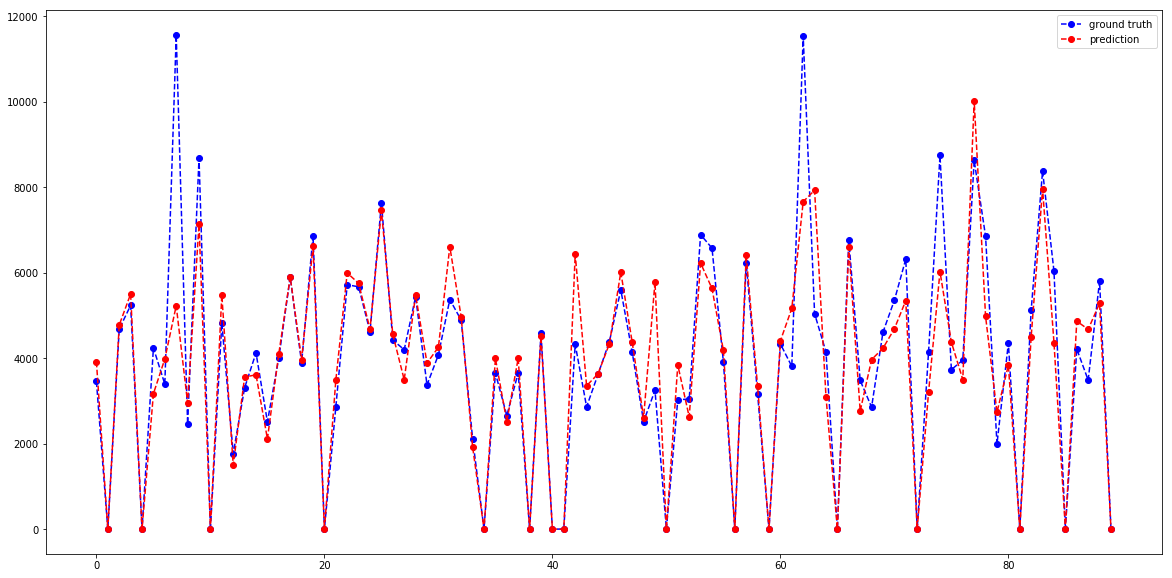

In [20]:
plt.figure(figsize=(20, 10))  # Set figsize to increase size of figure
plt.plot(y_test.values[:90], 'bo--', label="ground truth")
plt.plot(results[names.index('ScaledRF')][:90], 'ro--', label="prediction")
plt.legend()

## 6. Tuning the best model

### 6.1 Calculate the Region Error and Total Error

Comparison above shows that **Random Forest** is the best model with the lowest Total Error. We first calculate the evalution errors.

In [21]:
test = X_test.join(y_test)
test['pred']=results[names.index('ScaledRF')]

Compute region error:

In [22]:
Region = test.Region.unique()
Ertotal=0
for i in Region:
    print('Error Region'+ str(i))
    print( sum(abs(test.loc[test['Region'] == i].NumberOfSales - test.loc[test['Region'] == i].pred))/sum(test.loc[test['Region'] == i].NumberOfSales))
    Ertotal = Ertotal + sum(abs(test.loc[test['Region'] == i].NumberOfSales - test.loc[test['Region'] == i].pred))/sum(test.loc[test['Region'] == i].NumberOfSales)

Error Region6
0.15870809504450611
Error Region2
0.14075482116088958
Error Region9
0.16438499082313185
Error Region1
0.1708203948365225
Error Region3
0.16384305984994552
Error Region7
0.1564662397168451
Error Region5
0.17465841804028398
Error Region0
0.166372199456488
Error Region10
0.1539632024949257
Error Region8
0.1428239361851248
Error Region4
0.12547425386239608


Compute total error:

In [23]:
E=Ertotal/len(Region)
print('Total Error: ', E)

Total Error:  0.15620632831555084


### 6.2 Feature Importances

Find out which features are important:

In [24]:
model_rand_forest = RandomForestRegressor(random_state=42)
model_rand_forest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [25]:
feature_labels = list(X_train.columns.values)
importance = model_rand_forest.feature_importances_
feature_indexes_by_importance = importance.argsort()[::-1]
for index in feature_indexes_by_importance:
    print('Variable: {:40}  Importance: {:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))

Variable: IsOpen                                    Importance: 45.64%
Variable: NearestCompetitor                         Importance: 20.64%
Variable: HasPromotions                             Importance: 7.24%
Variable: Region_AreaKM2                            Importance: 2.83%
Variable: Region_PopulationK                        Importance: 2.12%
Variable: Region_GDP                                Importance: 1.67%
Variable: AssortmentType_General                    Importance: 1.31%
Variable: WindDirDegrees                            Importance: 1.29%
Variable: Region                                    Importance: 1.19%
Variable: StoreType_Hyper Market                    Importance: 0.94%
Variable: Min_Sea_Level_PressurehPa                 Importance: 0.92%
Variable: Min_Humidity                              Importance: 0.91%
Variable: Mean_Wind_SpeedKm_h                       Importance: 0.91%
Variable: StoreType_Standard Market                 Importance: 0.86%
Variable: Mean_Hum

Text(0.5,1,'Feature Importances')

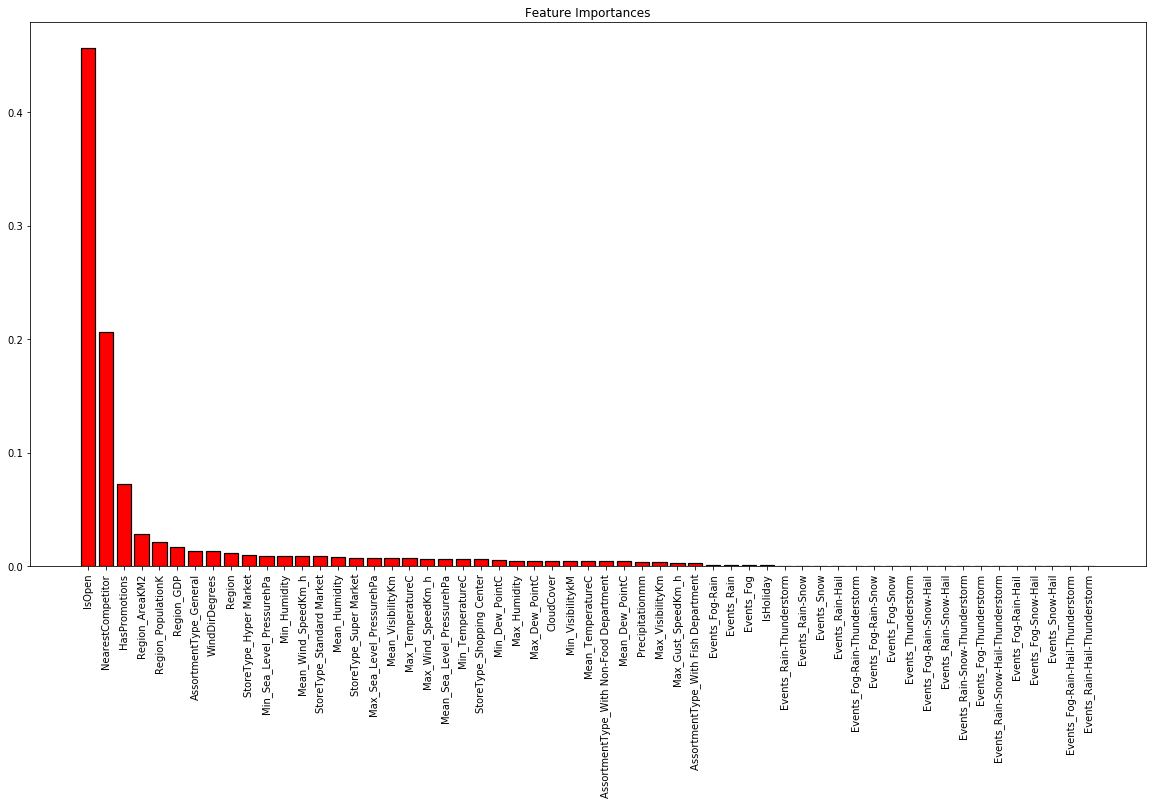

In [26]:
plt.figure(figsize=(20, 10))  # Set figsize to increase size of figure
x_values = list(range(len(feature_indexes_by_importance)))
# List of features sorted from most to least important
sorted_features= [feature_labels[i] for i in feature_indexes_by_importance]
sorted_importances = [importance[i] for i in feature_indexes_by_importance]
plt.bar(x_values, sorted_importances, orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2)
plt.xticks(x_values, sorted_features, rotation='vertical')
plt.title("Feature Importances")

Make a cumulative importance graph that shows the contribution to the overall importance of each additional variable. The dashed line is drawn at 95% of total importance.

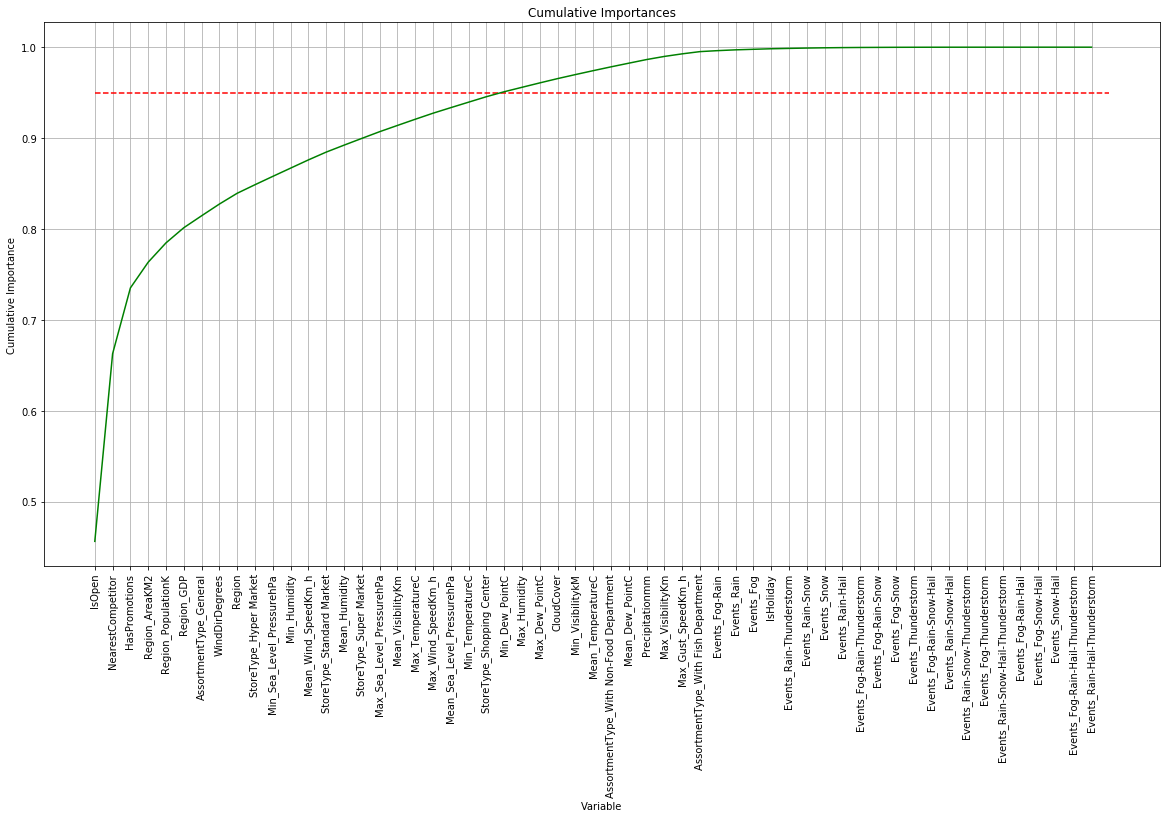

In [27]:
plt.figure(figsize=(20, 10))  # Set figsize to increase size of figure
# Cumulative importances
cumulative_importances = np.cumsum(sorted_importances)
# Make a line graph
plt.plot(x_values, cumulative_importances, 'g-')
# Draw line at 95% of importance retained
plt.hlines(y = 0.95, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')
plt.grid()
# Format x ticks and labels
plt.xticks(x_values, sorted_features, rotation = 'vertical')
# Axis labels and title
plt.xlabel('Variable'); plt.ylabel('Cumulative Importance'); plt.title('Cumulative Importances');

Remove unimportant features. 95% is an arbitrary threshold, but if it leads to noticeably poor performance we can adjust the value. First, we need to find the exact number of features to exceed 95% importance:

In [28]:
# Find number of features for cumulative importance of 95%
# Add 1 because Python is zero-indexed
numb=np.where(cumulative_importances > 0.95)[0][0] + 1
print('Number of features for 95% importance:', numb)

Number of features for 95% importance: 24


We can then create a new training and testing set retaining only the 6 most important features.

In [29]:
# Extract the names of the most important features
important_feature_names = [feature for feature in sorted_features[0:numb-1]]
# Create training and testing sets with only the important features
important_train_features = X_train[important_feature_names]
important_test_features = X_test[important_feature_names]
# Sanity check on operations
print('Important train features shape:', important_train_features.shape)
print('Important test features shape:', important_test_features.shape)

Important train features shape: (366114, 23)
Important test features shape: (156907, 23)


### 6.3 Train and Evalution only use Important Featues

In [30]:
# Train the expanded model on only the important features
model_rand_forest .fit(important_train_features, y_train);
# Make predictions on test data
predictions = model_rand_forest .predict(important_test_features)
# Performance metrics
model_mse = mean_squared_error(predictions, y_test)
model_rmse = np.sqrt(model_mse)
print("Random Forest only use Important Features R squared: {:4f}, RMSE: {:4f}".format(model_rand_forest.score(important_test_features, y_test),  model_rmse))

Random Forest only use Important Features R squared: 0.855518, RMSE: 1037.145581


In [31]:
test2 = important_test_features.join(y_test)
test2['pred']=predictions
Region = test2.Region.unique()
Ertotal_im=0
for i in Region:
    Ertotal_im = Ertotal_im + sum(abs(test2.loc[test2['Region'] == i].NumberOfSales - test2.loc[test2['Region'] == i].pred))/sum(test2.loc[test2['Region'] == i].NumberOfSales)
    
E_im=Ertotal_im/len(Region)
print('Total Error: ', E_im)

Total Error:  0.1570558873813063


### 6.4 Accuracy vs Run-Time

Using only the eight most important features (instead of all 16) results in a minor increase in Total Error by 0.00084955906575546. For some models, decreasing the number of features can increase performance and therefore should be done. However, in other situations, performance will decrease but run time will also decrease. The final decision on how many features to retain will therefore be a trade-off between accuracy and run time.

In [32]:
# Use time library for run time evaluation
import time

# All features training and testing time
all_features_time = []

# Do 10 iterations and take average for all features
for _ in range(10):
    start_time = time.time()
    model_rand_forest.fit(X_train, y_train)
    all_features_predictions = model_rand_forest.predict(X_test)
    end_time = time.time()
    all_features_time.append(end_time - start_time)

all_features_time = np.mean(all_features_time)
print('All features average training and testing time:', round(all_features_time, 2), 'seconds.')

All features average training and testing time: 81.41 seconds.


In [33]:
# Time training and testing for reduced feature set
reduced_features_time = []

# Do 10 iterations and take average
for _ in range(10):
    start_time = time.time()
    model_rand_forest.fit(important_train_features, y_train)
    reduced_features_predictions = model_rand_forest.predict(important_test_features)
    end_time = time.time()
    reduced_features_time.append(end_time - start_time)

reduced_features_time = np.mean(reduced_features_time)
print('Reduced features average training and testing time:', round(reduced_features_time, 2), 'seconds.')

KeyboardInterrupt: 

In [ ]:
error_all =  E
error_im = E_im

comparison = pd.DataFrame({'features': ['all (58)', 'reduced (24)'], 
                           'run_time(s)': [round(all_features_time, 2), round(reduced_features_time, 2)],
                           'all_error': [round(error_all, 6), round(error_im, 6)]})

comparison[['features', 'all_error', 'run_time(s)']]

In [ ]:
relative_total_increase = 100 * abs(error_all-error_im) / error_all
print('Relative increase of all error:', round(relative_total_increase, 3), '%.')

relative_runtime_decrease = 100 * (all_features_time - reduced_features_time) / all_features_time
print('Relative decrease in run time:', round(relative_runtime_decrease, 3), '%.')

## 7. Predict the sum of product for March and April